### Desafío - Dimensionalidad y Agrupación (I)

<br>
<br>

Nombre: Moises Reinaldo Quiroz Diaz

Profesor: Gabriel Tamayo

Generación: 3


* Para poder realizar esta actividad debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip


### Contexto

Para esta actividad utilizaremos un subconjunto de 25 items de la International Personality Item Pool, aplicados a 2800 individuos. El objetivo de esta información es desarrollar perfiles de personalidad en base a una serie de oraciones asociadas a las características Amabilidad, Escrupolisidad, Extroversión, Neuroticismo, Apertura. Los individuos deben responder qué tan adecuada es la oración respecto a su personalidad en base a 6 categorías:
* 1: No me representa para nada.
* 2: No me representa.
* 3: Algunas cosas no me representan.
* 4: Algunas cosas me representan.
* 5: Me representa.
* 6: Me representa completamente.

Las 25 preguntas son:
* A1 Soy indiferente a los sentimientos de otros.
* A2 Me preocupo del bienestar de otros.
* A3 Sé cómo confortar a otros.
* A4 Me agradan los niños.
* A5 Hago sentir tranquila a la gente.
* C1 Soy exacto en mi trabajo.
* C2 Sigo con mis tareas hasta que todo esté perfecto.
* C3 Hago cosas siguiendo un plan.
* C4 Hago cosas con el mínimo esfuerzo.
* C5 Pierdo mi tiempo.
* E1 No hablo mucho con las personas.
* E2 Me es dificil acercarme a otros.
* E3 Sé cómo cautivar gente.
* E4 Hago amigos de forma fácil.
* E5 Puedo tomar el cargo de las cosas.
* N1 Me enojo con facilidad.
* N2 Me irrito con facilidad.
* N3 Tengo cambios de humor frecuentes.
* N4 Usualmente me siento melancólico.
* N5 Entro en pánico con facilidad.
* O1 Estoy lleno de ideas.
* O2 Evito leer material difícil.
* O3 Tiendo a llevar la conversación a niveles más altos.
* O4 Dedico tiempo a la reflexión de cosas.
* O5 No profundizaré sobre una materia específica.

Se registraron una serie de covariables sobre características demográficas de los encuestados:
* gender Hombre = 1, Mujer =2.
* education 1 = Educación Media Incompleta, 2 = Educación Media Completa, 3 = Educación Universitaria Incompleta, 4 = Educación Universitaria Completa 5 = Estudios de Postgrado.
* age Edad en Años.


Implementaremos un modelo de extracción factorial para identificar los principales perfiles
psicológicos.


### Desafío 1: Lectura de archivos

Importe las librerías necesarias para el análisis factorial siguiendo las convenciones.
Importe la base de datos bfi.csv y asígnela a un objeto df.
Solicite las primeras 5 observaciones con head.

In [1]:
import missingno as msngo
import factor_analyzer as fact

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('bfi.csv')
df.head(5)

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


### Desafío 2: Preprocesamiento
* Elimine las columnas redundantes de la base, tal como 'Unnamed: 0' .
* Analice el patrón de datos perdidos con missingno . Comente cuáles son las principales variables con mayores tasas de valores perdidos.
* Genere un nuevo objeto donde almacenará la base sin valores perdidos.

In [8]:
df = df.drop(['Unnamed: 0'],axis=1)
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


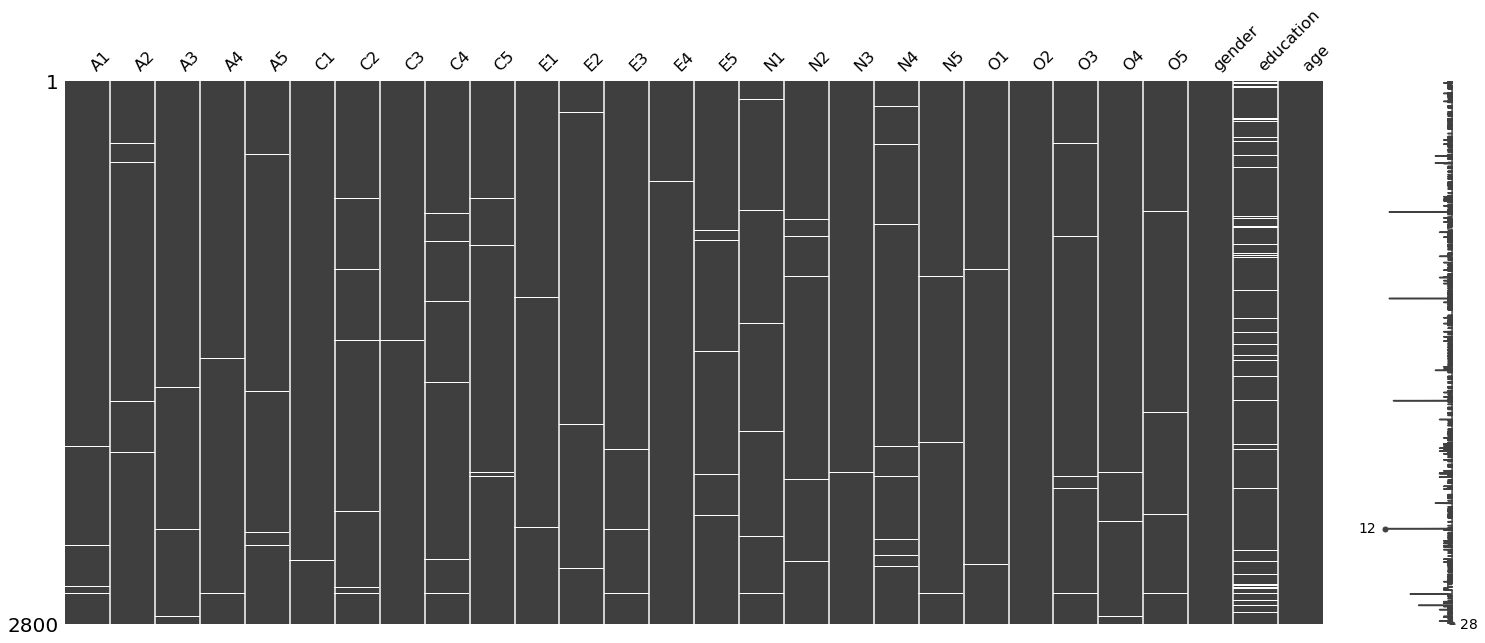

In [9]:
msngo.matrix(df)

* Education es el que tiene mayor cantidad de datos perdidos

In [184]:
tmp = df.dropna()

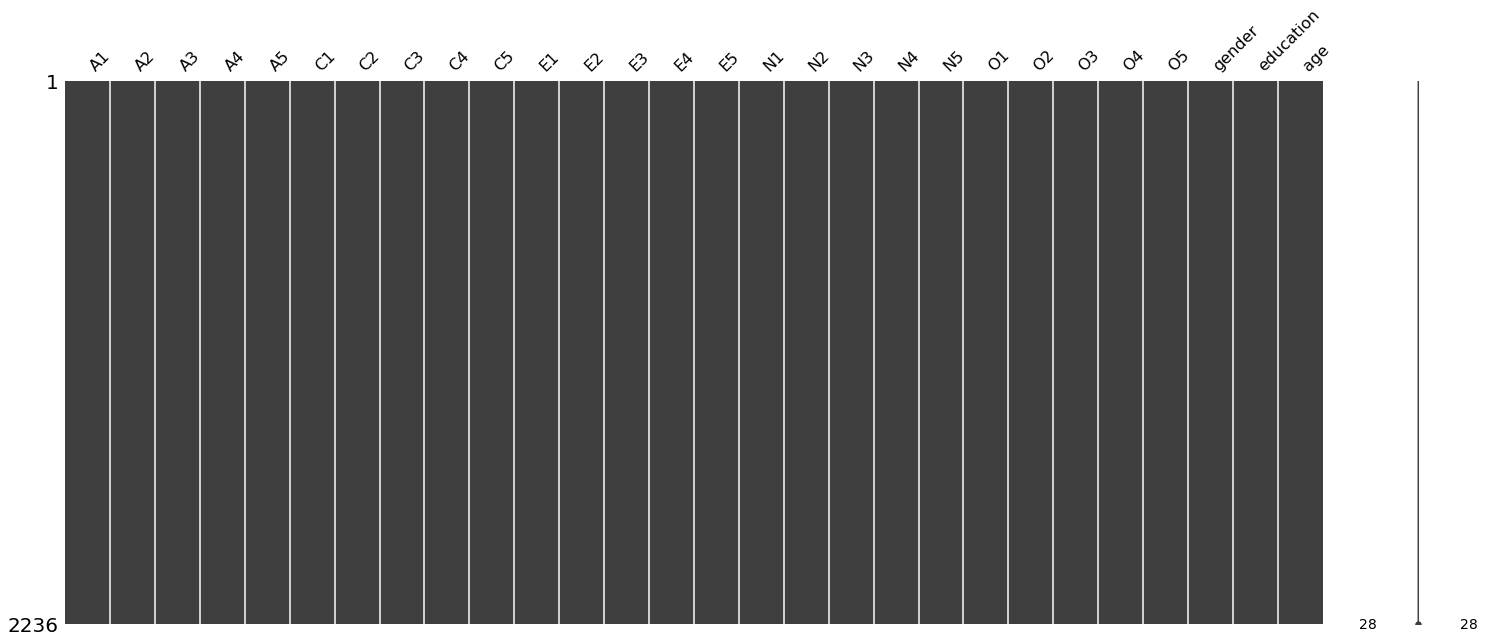

In [11]:
msngo.matrix(tmp)

### Desafío 3: Descripción
* Separe en un nuevo objeto DataFrame la batería de preguntas a extraer.
* Reporte las medias para cada uno de las preguntas de la batería. Esto lo puede lograr con un dotplot.
* Genere una matriz de correlaciones con este nuevo objeto. Visualícelo con heatmap .
* Comente sobre los principales patrones de correlación entre las preguntas de la batería.

In [24]:
df_preguntas = tmp.loc[:,'A1':'O5']

In [96]:
medias = df_preguntas.describe().loc[['mean']]
medias = medias.sort_values(by='mean',axis=1)

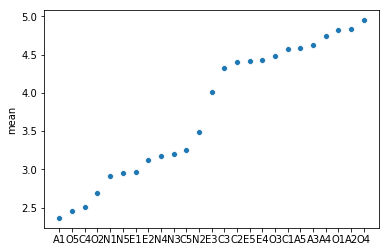

In [100]:
sns.scatterplot(x=medias.columns,y= medias.loc['mean'])

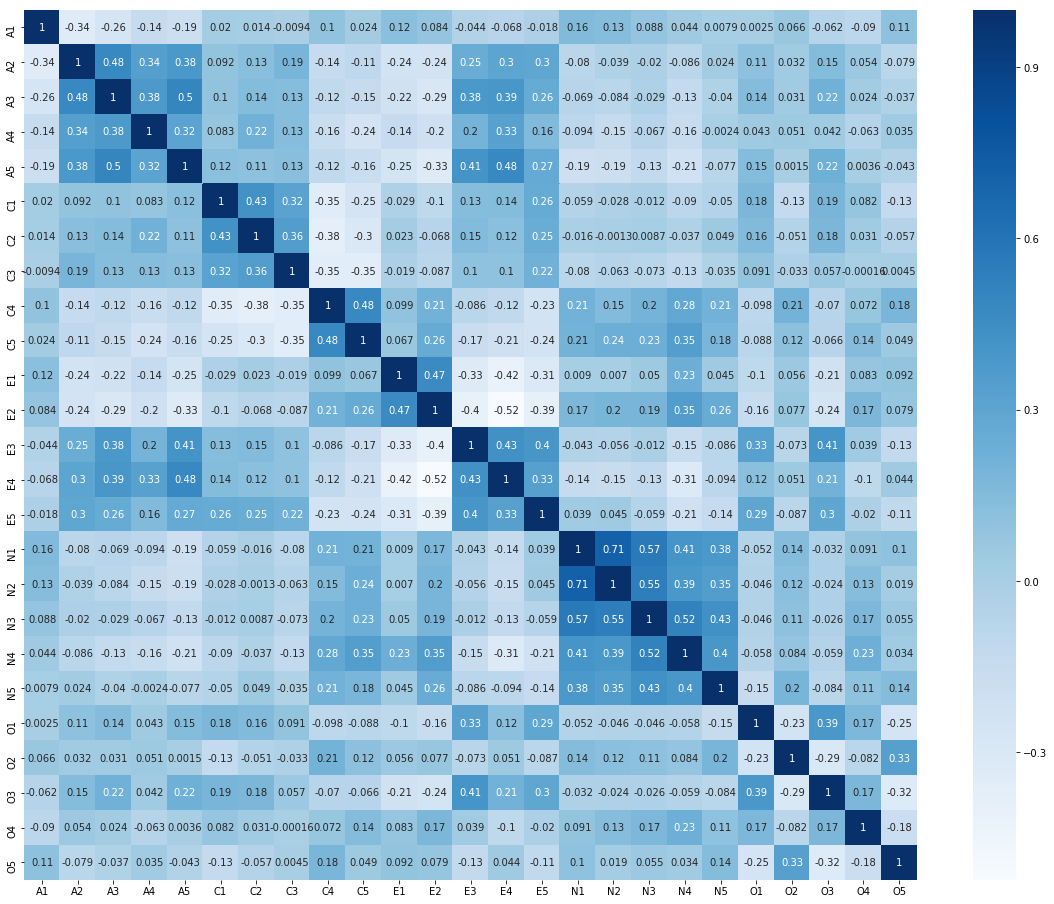

In [111]:
plt.figure(figsize=(20,16))
sns.heatmap(df_preguntas.corr(),cmap='Blues',annot=True)

* Se observa una mayor correlacion entre las preguntas del mismo tipo, exeptuando las 'O' que varian un poco, las mas relacionadas son N1 y N2, pero en general dentro del mismo tipo todas estan relacionadas

### Desafío 4: Extracción de factores
* Antes de iniciar la extracción de factores, inspeccione la ideonidad de la batería de preguntas para realizar un análisis factorial mediante la prueba de esferacidad de Barlett y Kaiser-MeyerOlkin. Comente los resultados.
* Instancie un objeto con FactorAnalyzer() donde se estimen 10 dimensiones latentes y no se aplique rotación.
* Genere un scree plot entre los eigenvalues del modelo y la cantidad de dimensiones estimables.
* Refactorice el objeto con FactorAnalyzer() con rotacion (rotacion = 'promax') y la cantidad de dimensiones válidas que informó el scree plot.
* Extraiga las cargas del modelo e identifique qué items están asociados a cada factor. Comente sobre qué significa cada factor construído.

In [112]:
#Berlett
fact.calculate_bartlett_sphericity(df_preguntas)

(16484.781654160415, 0.0)

Como tiene un p-value menor a 0.5 no se trata de un matriz de identidad

In [120]:
fact.calculate_kmo(df_preguntas)

(         KMO
 A1  0.738005
 A2  0.834387
 A3  0.871681
 A4  0.870525
 A5  0.900699
 C1  0.838225
 C2  0.788569
 C3  0.849578
 C4  0.823776
 C5  0.861994
 E1  0.841634
 E2  0.883987
 E3  0.893156
 E4  0.878282
 E5  0.894127
 N1  0.778281
 N2  0.778607
 N3  0.860167
 N4  0.886345
 N5  0.860604
 O1  0.855123
 O2  0.783962
 O3  0.833868
 O4  0.781271
 O5  0.758213, 0.8469455121781353)

con un valor a .7 se estima que se puede continuar

In [124]:
factor_preguntas = fact.FactorAnalyzer()

In [125]:
factor_preguntas.analyze(data=df_preguntas,n_factors=10,method=None)

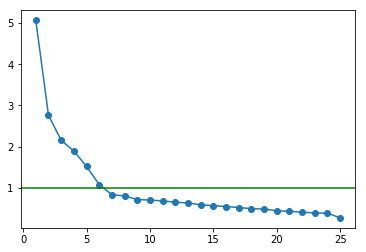

In [126]:
fact_scree = factor_preguntas.get_eigenvalues()[0]
plt.plot(fact_scree.index+1,fact_scree.values,'o-')
plt.axhline(1,color='green')

In [129]:
factor_preguntas2 = fact.FactorAnalyzer()

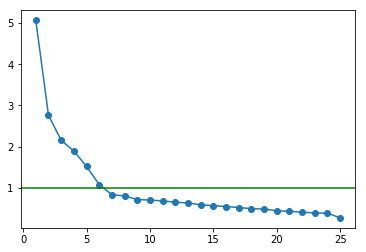

In [130]:
factor_preguntas2.analyze(data=df_preguntas,n_factors=5,method='promax')
fact_scree = factor_preguntas2.get_eigenvalues()[0]
plt.plot(fact_scree.index+1,fact_scree.values,'o-')
plt.axhline(1,color='green')

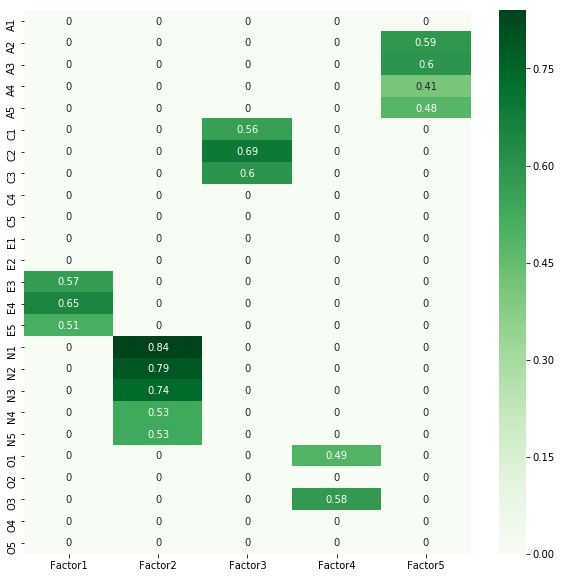

In [133]:
#Extraccion de cargas
plt.figure(figsize=(10,10))
factor_load = factor_preguntas2.loadings
factor_load = factor_load.applymap(lambda x: np.where(x<.4,0,round(x,2)))
sns.heatmap(factor_load,cmap='Greens',annot=True)

#### Factor 1
    
    desde E3 a E1: Tiene que ver con habilidades interpersonales y de liderazgo

#### Factor 2
    
    desde N1 a N5: Con alteraciones de humor, con tendencia a sentimientos negativos

#### Factor 3

    de C1 a C3: Con una persona metodica que tiende a seguir los planes al pie de la letra

#### Factor 4

    O1 y O3: Con una persona divergente, que tiende a tener converzaciones profundas

#### Factor 5

    de A2 a A5: Una persona con empatia

### Desafío 5: Modelación de factores
* Extraiga los puntajes del modelo factorial a su base de datos.
*  Modele y comente brevemente sobre cuáles son los principales determinantes de cada factor en base al siguiente modelo estimable:


$${y}={{\beta }_{0} + {\beta }_{1} \cdot {gender} + {\beta }_{2} \cdot {education} + {\beta }_{3} \cdot {age} +{\epsilon}_{i}}$$


<br>
Tips: Utilice statsmodels para la generación del modelo y comente que tan significativos son los regresores, estos  afectan positiva o negativamente el factor estimado?.


In [138]:
factor_var = factor_preguntas2.get_factor_variance()
factor_var

,Factor1,Factor2,Factor3,Factor4,Factor5
SS Loadings,2.519441,2.712895,2.029886,1.481834,1.578099
Proportion Var,0.100778,0.108516,0.081195,0.059273,0.063124
Cumulative Var,0.100778,0.209293,0.290489,0.349762,0.412886


In [140]:
factor_scores = factor_preguntas2.get_scores(df_preguntas)

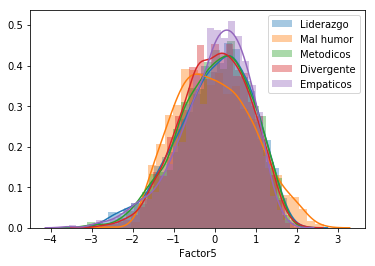

In [142]:
sns.distplot(factor_scores['Factor1'],label='Liderazgo')
sns.distplot(factor_scores['Factor2'],label='Mal humor')
sns.distplot(factor_scores['Factor3'],label='Metodicos')
sns.distplot(factor_scores['Factor4'],label='Divergente')
sns.distplot(factor_scores['Factor5'],label='Empaticos')
plt.legend()

* Se observa que la mayor cantidad se concentra en empaticos

In [194]:
import statsmodels.formula.api as smf

In [191]:
d2 = tmp.loc[:,['age','gender','education']].reset_index(drop=True)

In [192]:
tmp2 = pd.concat([factor_scores,d2],axis=1)
tmp2.head()

,Factor1,Factor2,Factor3,Factor4,Factor5,age,gender,education
0,1.243678,0.026460,1.424903,0.399940,0.150827,21,2,3.0
1,-1.825678,0.578436,-1.283249,-0.574451,-2.160638,19,1,2.0
2,0.199390,-0.166390,-0.180774,-0.347959,-0.103883,21,1,1.0
3,-0.093278,-0.493823,0.544909,-0.285536,-1.640317,17,1,1.0
4,0.190778,-0.869320,-1.337657,0.304891,0.637236,68,1,5.0


In [200]:
facto1 =smf.ols('Factor1 ~ age +gender +education',tmp2).fit()
facto1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Factor1   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     12.56
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.82e-08
Time:                        12:58:37   Log-Likelihood:                -2948.8
No. Observations:                2236   AIC:                             5906.
Df Residuals:                    2232   BIC:                             5928.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4738      0.097     -4.889      0.000      -0.664      -0.284
age            0.0054      0.002      2.933      0.003       0.002       0.009
gender         0.2142      0.041      5.249      0.000       0.134       0.294
education     -0.0141      0.018     -0.791      0.429      -0.049       0.021
==============================================================================
Omnibus:                       71.296   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.886
Skew:                          -0.446   Prob(JB):                     2.02e-17
Kurtosis:                       2.829   Cond. No.                         167.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Se observa que el genero es lo que mas influye en este facor

In [201]:
facto1 =smf.ols('Factor2 ~ age +gender +education',tmp2).fit()
facto1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Factor2   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     15.38
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.63e-10
Time:                        12:59:14   Log-Likelihood:                -2980.0
No. Observations:                2236   AIC:                             5968.
Df Residuals:                    2232   BIC:                             5991.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0124      0.098     -0.127      0.899      -0.205       0.180
age           -0.0096      0.002     -5.111      0.000      -0.013      -0.006
gender         0.1842      0.041      4.452      0.000       0.103       0.265
education     -0.0036      0.018     -0.199      0.842      -0.039       0.032
==============================================================================
Omnibus:                       71.154   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.985
Skew:                           0.273   Prob(JB):                     5.15e-12
Kurtosis:                       2.491   Cond. No.                         167.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Se observa que el genero y la edad son lo que mas influyen para este caso

In [202]:
facto1 =smf.ols('Factor3 ~ age +gender +education',tmp2).fit()
facto1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Factor3   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     13.79
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.50e-09
Time:                        12:59:50   Log-Likelihood:                -2878.3
No. Observations:                2236   AIC:                             5765.
Df Residuals:                    2232   BIC:                             5787.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5217      0.094     -5.556      0.000      -0.706      -0.338
age            0.0081      0.002      4.491      0.000       0.005       0.012
gender         0.1665      0.040      4.210      0.000       0.089       0.244
education      0.0016      0.017      0.091      0.927      -0.032       0.035
==============================================================================
Omnibus:                       69.003   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.982
Skew:                          -0.447   Prob(JB):                     5.22e-17
Kurtosis:                       2.920   Cond. No.                         167.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Se observa que el genero y la edad son lo que mas influyen para este caso

In [206]:
facto1 =smf.ols('Factor4 ~ age +gender +education',tmp2).fit()
facto1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Factor4   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     21.19
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.56e-13
Time:                        13:00:53   Log-Likelihood:                -2742.4
No. Observations:                2236   AIC:                             5493.
Df Residuals:                    2232   BIC:                             5516.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0827      0.088     -0.935      0.350      -0.256       0.091
age            0.0033      0.002      1.975      0.048    2.44e-05       0.007
gender        -0.1787      0.037     -4.803      0.000      -0.252      -0.106
education      0.0886      0.016      5.460      0.000       0.057       0.120
==============================================================================
Omnibus:                       34.399   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.902
Skew:                          -0.276   Prob(JB):                     4.35e-08
Kurtosis:                       2.756   Cond. No.                         167.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Para este caso es el genero y la educacion lo que mas influyen

In [207]:
facto1 =smf.ols('Factor5 ~ age +gender +education',tmp2).fit()
facto1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Factor5   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     42.04
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.02e-26
Time:                        13:01:28   Log-Likelihood:                -2776.1
No. Observations:                2236   AIC:                             5560.
Df Residuals:                    2232   BIC:                             5583.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8727      0.090     -9.729      0.000      -1.049      -0.697
age            0.0062      0.002      3.599      0.000       0.003       0.010
gender         0.3895      0.038     10.311      0.000       0.315       0.464
education      0.0123      0.016      0.745      0.456      -0.020       0.045
==============================================================================
Omnibus:                      166.415   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.800
Skew:                          -0.693   Prob(JB):                     2.05e-45
Kurtosis:                       3.539   Cond. No.                         167.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Para este caso es el genero y la edad lo que mas influyen